# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing recreation.gov  Data

### 1. Importing your libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [1]:
##01 Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
##02 Importing cleaned df
df = pd.read_csv('/Users/emmawilcox/Desktop/camper_clean.csv')



In [3]:
df.head(5)

,Unnamed: 0,ordernumber,agency,orgid,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,...,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,clean_startdate,clean_enddate
0,1488,0343383462-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,GROUP STANDARD NONELECTRIC,...,0.0,258.0,2021-11-11T00:00:00Z,2021-11-16T00:00:00Z,2021-09-08T02:10:33.470611Z,5,12,Trailer,2021-11-11,2021-11-16
1,1492,0400231814-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,GROUP STANDARD NONELECTRIC,...,0.0,108.0,2022-03-18T00:00:00Z,2022-03-20T00:00:00Z,2022-02-06T01:38:16.919819Z,2,4,Fifth Wheel,2022-03-18,2022-03-20
2,1504,0404840886-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,GROUP STANDARD NONELECTRIC,...,0.0,108.0,2022-03-11T00:00:00Z,2022-03-13T00:00:00Z,2021-11-09T01:31:10.500458Z,2,12,Trailer,2022-03-11,2022-03-13
3,1525,0410136112-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,GROUP STANDARD NONELECTRIC,...,0.0,58.0,2022-01-09T00:00:00Z,2022-01-10T00:00:00Z,2021-12-12T22:17:51.124814Z,1,6,RV,2022-01-09,2022-01-10
4,1546,0416249892-1,BLM,126,AZ,Arizona,16669,Kingman Field Office,Burro Creek Campground,GROUP STANDARD NONELECTRIC,...,0.0,158.0,2022-02-18T00:00:00Z,2022-02-21T00:00:00Z,2022-01-05T17:24:17.047159Z,3,12,Fifth Wheel,2022-02-18,2022-02-21


In [4]:
##03 Reducing df to just columns needed Part 1
columns_to_keep2 = ['clean_startdate', 'totalbeforetax']

In [5]:
##04 Reducing df to just columns needed Part 2
df = df[columns_to_keep2]

In [6]:
##05 Looking at size of df
df.shape

(1704937, 2)

In [7]:
##06 Looking at how many columns, there are two plus an index
df.columns

Index(['clean_startdate', 'totalbeforetax'], dtype='object')

In [8]:
##07 Looking at dtypes
df.dtypes

clean_startdate     object
totalbeforetax     float64
dtype: object

In [9]:
##08 There are 365 days, a full 12 month year period, worth of bookings
df['clean_startdate'].value_counts (dropna = False)

2022-05-27    25497
2022-09-02    24209
2022-07-01    23473
2022-06-17    20089
2022-06-10    19168
              ...  
2021-12-25      539
2021-12-11      533
2021-12-08      522
2021-12-14      510
2022-01-08      492
Name: clean_startdate, Length: 365, dtype: int64

In [10]:
##09 Converting to datetime, setting that datetime column to be an index, aggregating daily data to be weekly, and showing total spent each week
# Convert 'clean_startdate' column to datetime format
df['clean_startdate'] = pd.to_datetime(df['clean_startdate'])

# Set the 'date' column as the index
df.set_index('clean_startdate', inplace=True)

# Resample the data weekly and perform aggregation (e.g., sum of a numeric column)
grouped_df_weekly = df.resample('W').agg({'totalbeforetax': 'sum'})

# Print the resulting grouped DataFrame
print(grouped_df_weekly)

                 totalbeforetax
clean_startdate                
2021-10-03           1249819.04
2021-10-10           2246729.22
2021-10-17           2173847.46
2021-10-24           1677923.32
2021-10-31           1186519.64
2021-11-07            901961.16
2021-11-14            802257.15
2021-11-21            851525.83
2021-11-28            778393.40
2021-12-05            474952.17
2021-12-12            370336.16
2021-12-19            390910.81
2021-12-26            463102.97
2022-01-02            578910.50
2022-01-09            382793.84
2022-01-16            452266.93
2022-01-23            423327.00
2022-01-30            414448.50
2022-02-06            423252.02
2022-02-13            516665.58
2022-02-20            589124.45
2022-02-27            531878.91
2022-03-06            827292.29
2022-03-13            984329.02
2022-03-20           1276376.23
2022-03-27           1185199.37
2022-04-03           1591983.75
2022-04-10           1529526.94
2022-04-17           1877922.92
2022-04-

In [29]:
##10 There are 53 weeks of data in df
distinct_count = grouped_df_weekly['totalbeforetax'].nunique()
print("Number of distinct values:", distinct_count)

Number of distinct values: 53


In [13]:
##11 Making sure index is sorted chronologically
grouped_df = grouped_df_weekly.sort_index()

In [14]:
##12 Confirming contents style
grouped_df.head()

,totalbeforetax
clean_startdate,
2021-10-03,1249819.04
2021-10-10,2246729.22
2021-10-17,2173847.46
2021-10-24,1677923.32
2021-10-31,1186519.64


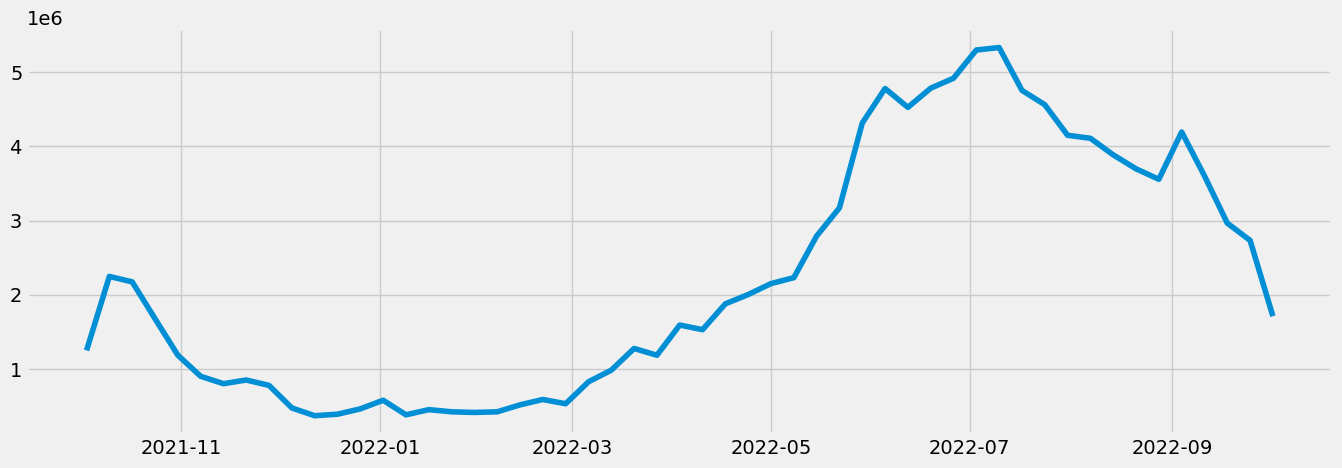

In [19]:
##13 Looks like spending spikes in July, that would be logicaly given that summertime is the best time to use an RV for most people
plt.figure(figsize=(15,5), dpi=100)
plt.plot(grouped_df)

### 2. Subsetting, wrangling, and cleaning time-series data

In [ ]:
##14 No nulls founds Check for missing values (you shouldn't have any)

grouped_df.isnull().sum() 

### 3. Time-series analysis: decomposition

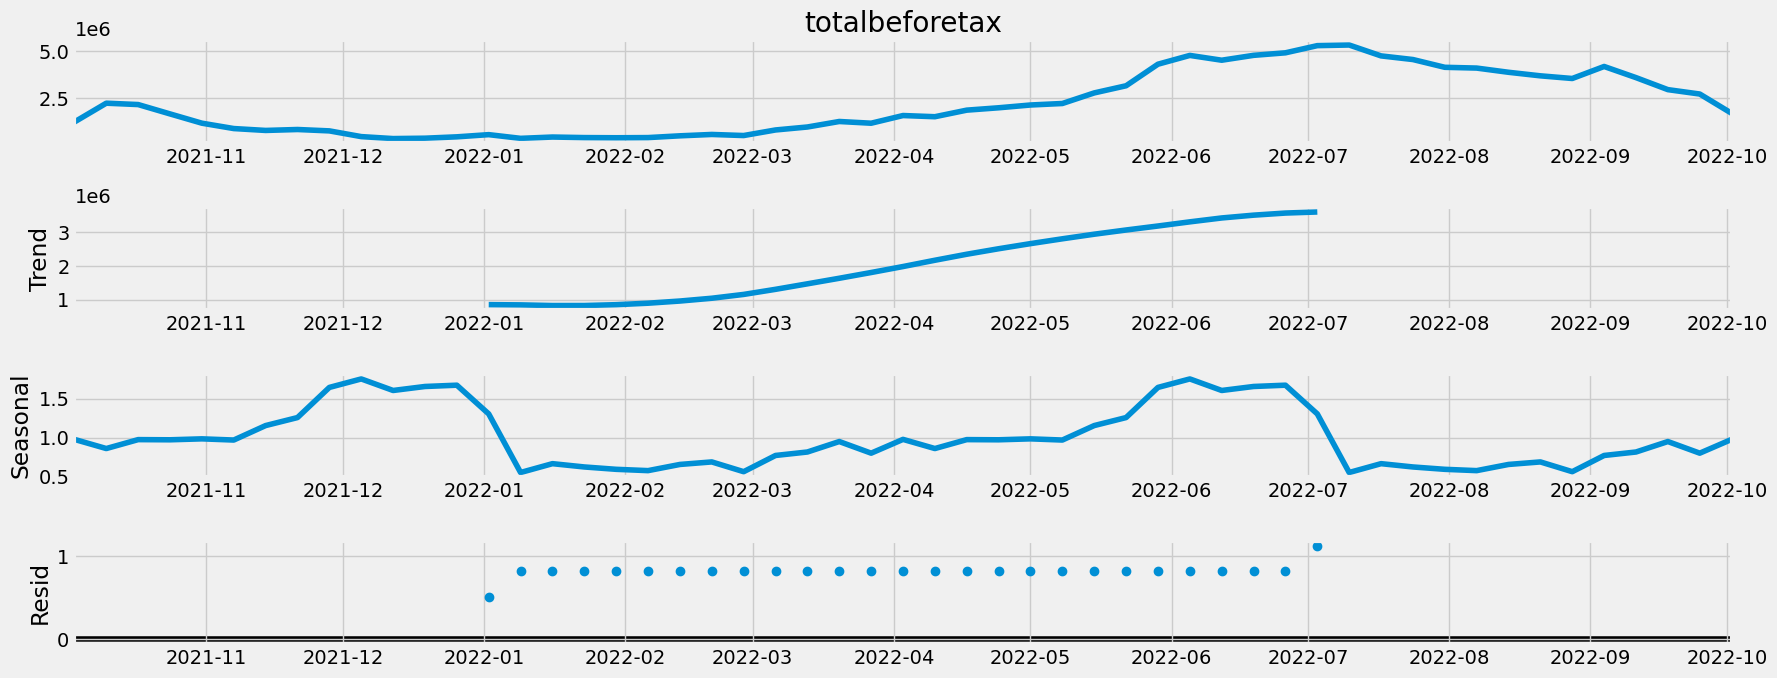

In [54]:
##15 Using a multiclipative model as I believe changes are non-linear, PLEASE CONFIRM
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Create a DataFrame with the provided data
data = {
    'clean_startdate': pd.to_datetime([
        '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
        '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28', '2021-12-05',
        '2021-12-12', '2021-12-19', '2021-12-26', '2022-01-02', '2022-01-09',
        '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13',
        '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
        '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24',
        '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29',
        '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03',
        '2022-07-10', '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07',
        '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11',
        '2022-09-18', '2022-09-25', '2022-10-02'
    ]),
    'totalbeforetax': [
        1249819.04, 2246729.22, 2173847.46, 1677923.32, 1186519.64,
        901961.16, 802257.15, 851525.83, 778393.40, 474952.17,
        370336.16, 390910.81, 463102.97, 578910.50, 382793.84,
        452266.93, 423327.00, 414448.50, 423252.02, 516665.58,
        589124.45, 531878.91, 827292.29, 984329.02, 1276376.23,
        1185199.37, 1591983.75, 1529526.94, 1877922.92, 2002956.02,
        2150496.71, 2230102.90, 2790991.42, 3170554.72, 4313281.58,
        4778759.45, 4524586.71, 4782943.82, 4916887.70, 5297493.04,
        5330426.63, 4753608.08, 4560334.93, 4148671.98, 4107924.76,
        3884665.18, 3696686.15, 3555552.70, 4192570.83, 3601378.10,
        2964785.03, 2732339.32, 1711063.07
    ]
}

df = pd.DataFrame(data)
df.set_index('clean_startdate', inplace=True)

# Set the frequency of the DatetimeIndex to weekly ('W')
df = df.asfreq('W')

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df['totalbeforetax'], model='multiclipative', period=26)  # Assuming 53 weeks in a year

# Plot the separate components
decomposition.plot()
plt.show()

In [55]:
##16 Ensuring proper chart size
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

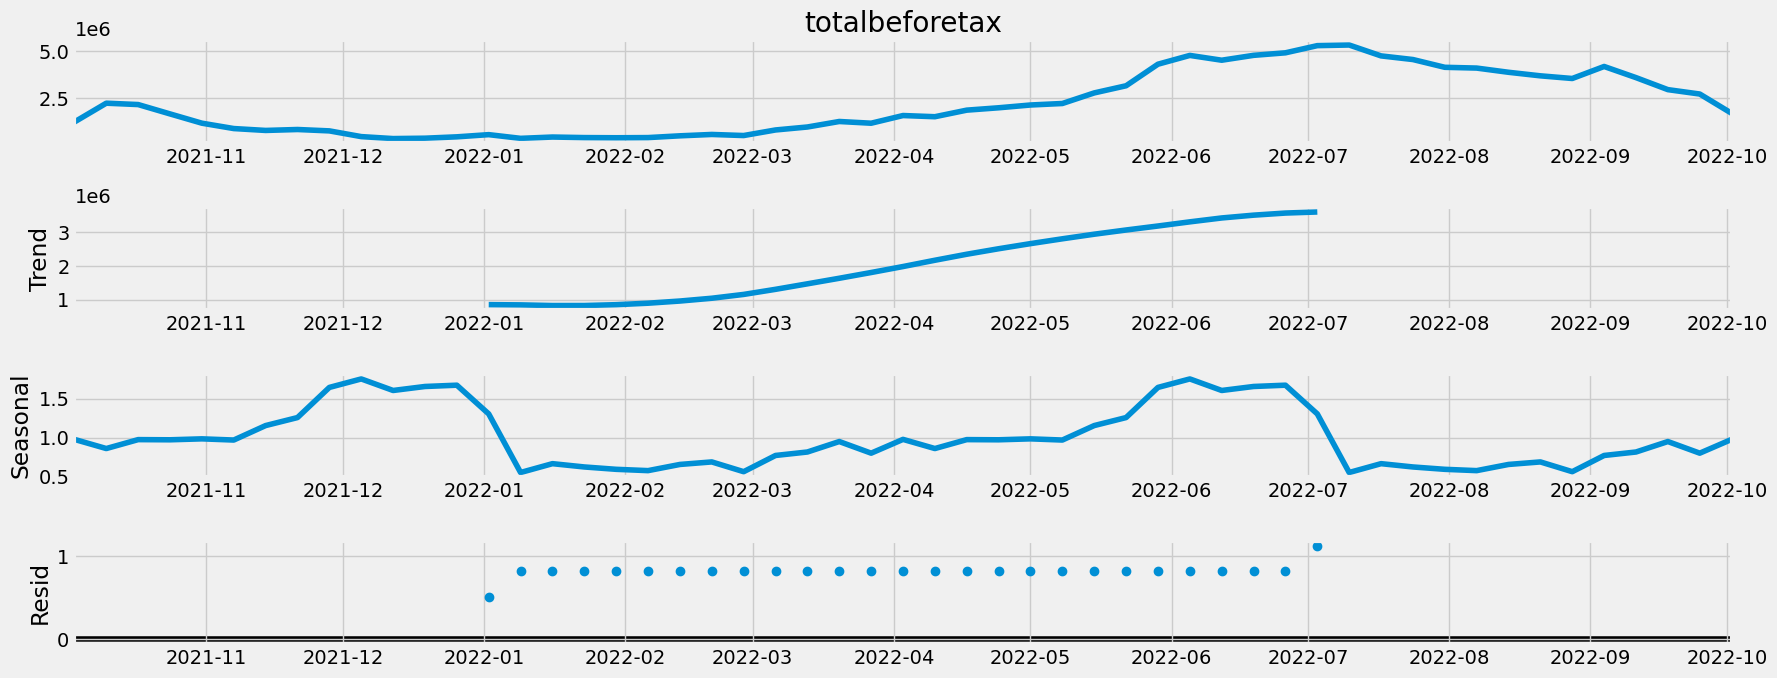

In [56]:
##17 Plot the separate components

decomposition.plot()
plt.show()

What I see in this decomposed data is that during each annual year for this government agency (runs October 2021 - September 2022), the trend is an upward one. There appears to be seasonality with one spike presumably annually or it bi-annually???? Lastly it is showing some noise, but I do not understand what the significance of that is, it appears to be present in January 2021 and in July 2022. 

### 4. Testing for stationarity

In [57]:
##18 The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(grouped_df_weekly['totalbeforetax'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.195287
p-value                         0.675620
Number of Lags Used             2.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


The data is non-stationary, I cannot rule out my null hypothesis, which is that there is no root unit. The test statistic of -1.195 is greater than the 5% critical value of -2.92, and the p-value of 0.67 is larger than 0.05.

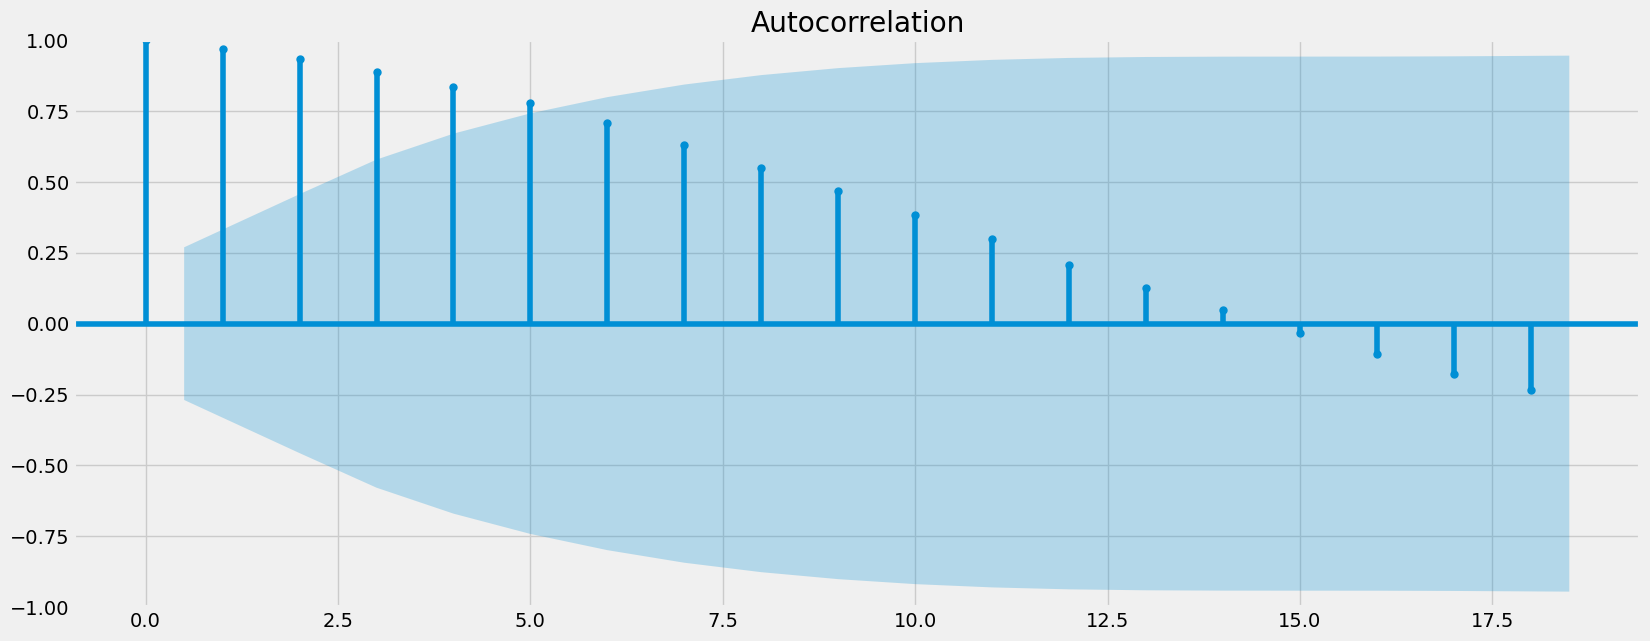

In [58]:
##19 Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(grouped_df_weekly)
plt.show()

The data is only partially correlated (???) as there are 5 lines above confidence level.

### 5. Stationarizing the Data

In [41]:
##20 First round of differencing
data_diff = grouped_df_weekly - grouped_df_weekly.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [42]:
##21
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [43]:
##22 Looking at changes to data
data_diff.head()

,totalbeforetax
clean_startdate,
2021-10-10,996910.18
2021-10-17,-72881.76
2021-10-24,-495924.14
2021-10-31,-491403.68
2021-11-07,-284558.48


In [44]:
##23 Checking data
data_diff.columns

Index(['totalbeforetax'], dtype='object')

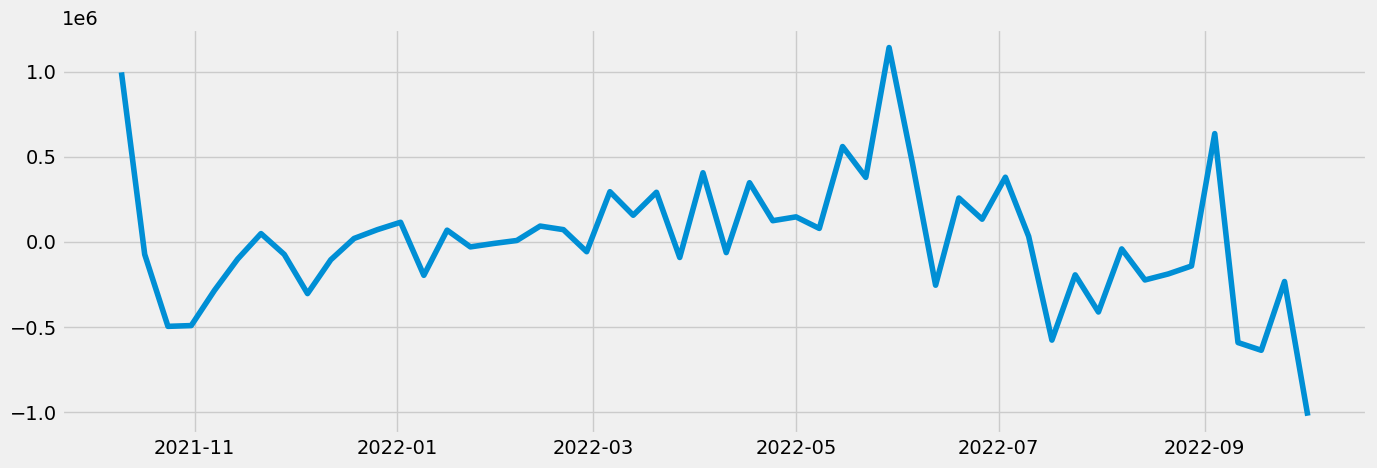

In [45]:
##24 Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [46]:
##25
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.960092
p-value                         0.038793
Number of Lags Used             1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


It is now only slightly necessary to re-difference, could this lead to over-differenced data???

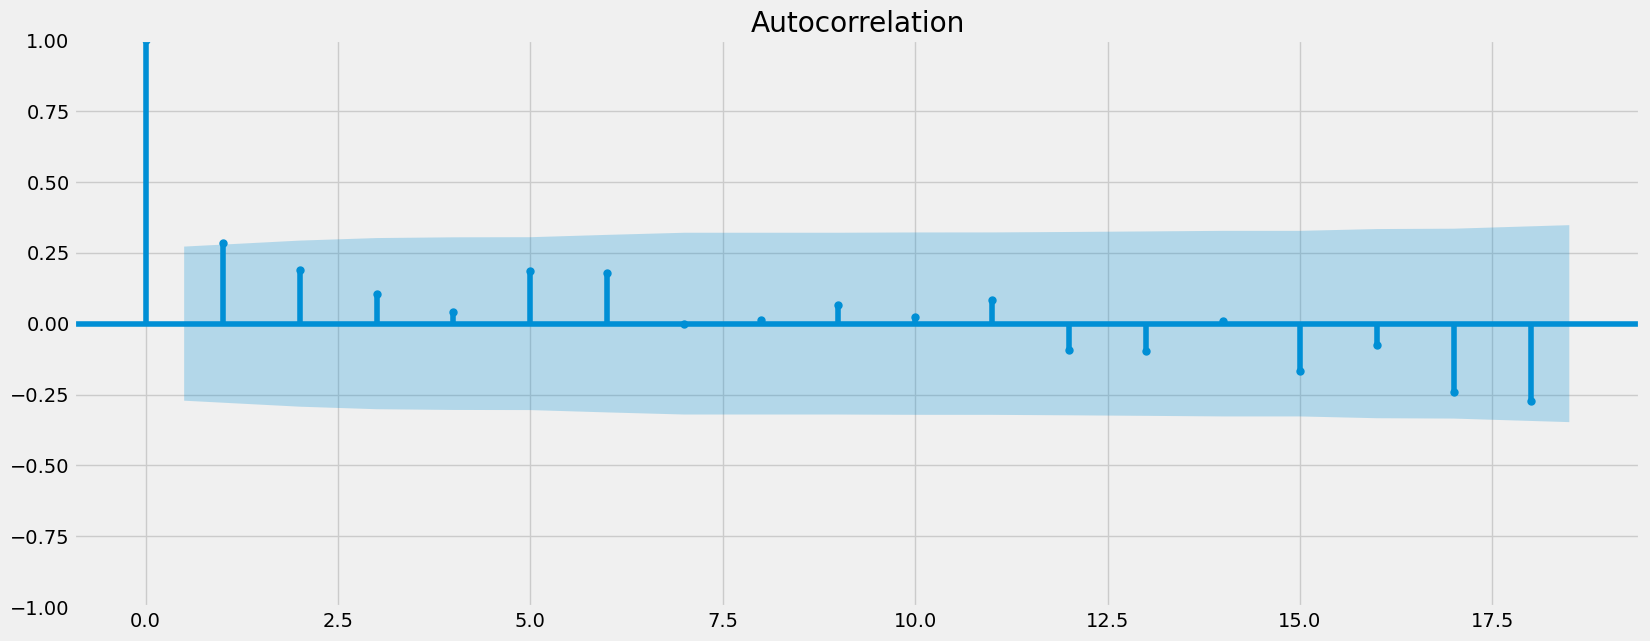

In [47]:
##26
plot_acf(data_diff)
plt.show()

In [48]:
##27 2nd round of differencing
data_diff_2 = data_diff - data_diff.shift(1)

In [49]:
##28 
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [50]:
##29
data_diff_2.head()

,totalbeforetax
clean_startdate,
2021-10-17,-1069791.94
2021-10-24,-423042.38
2021-10-31,4520.46
2021-11-07,206845.20
2021-11-14,184854.47


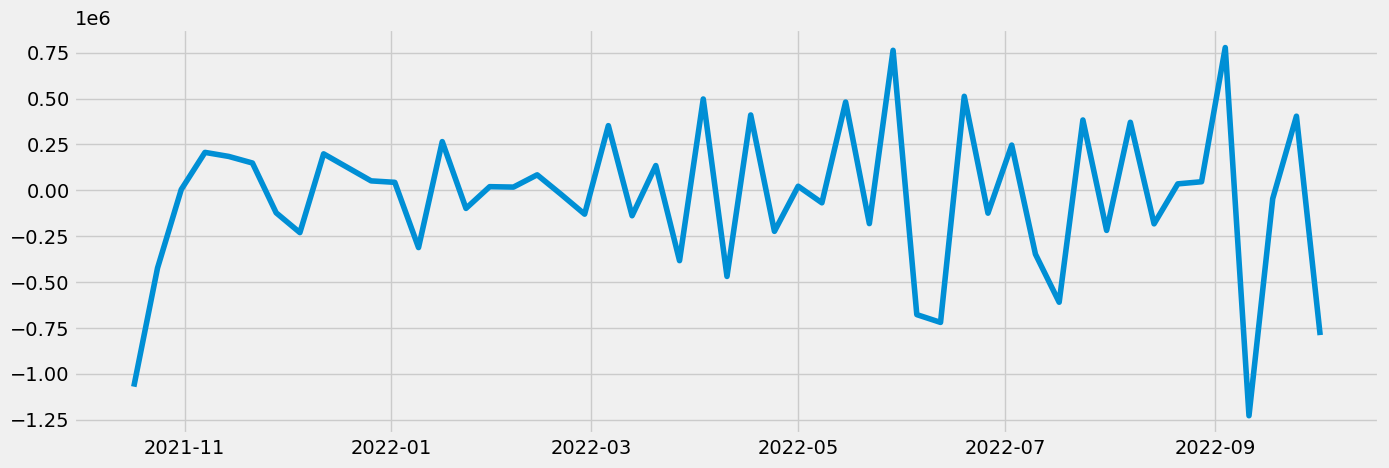

In [51]:
##30 Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [52]:
##31
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.642149e+00
p-value                        1.883529e-11
Number of Lags Used            1.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


The test statistic is much less than the critical value. 

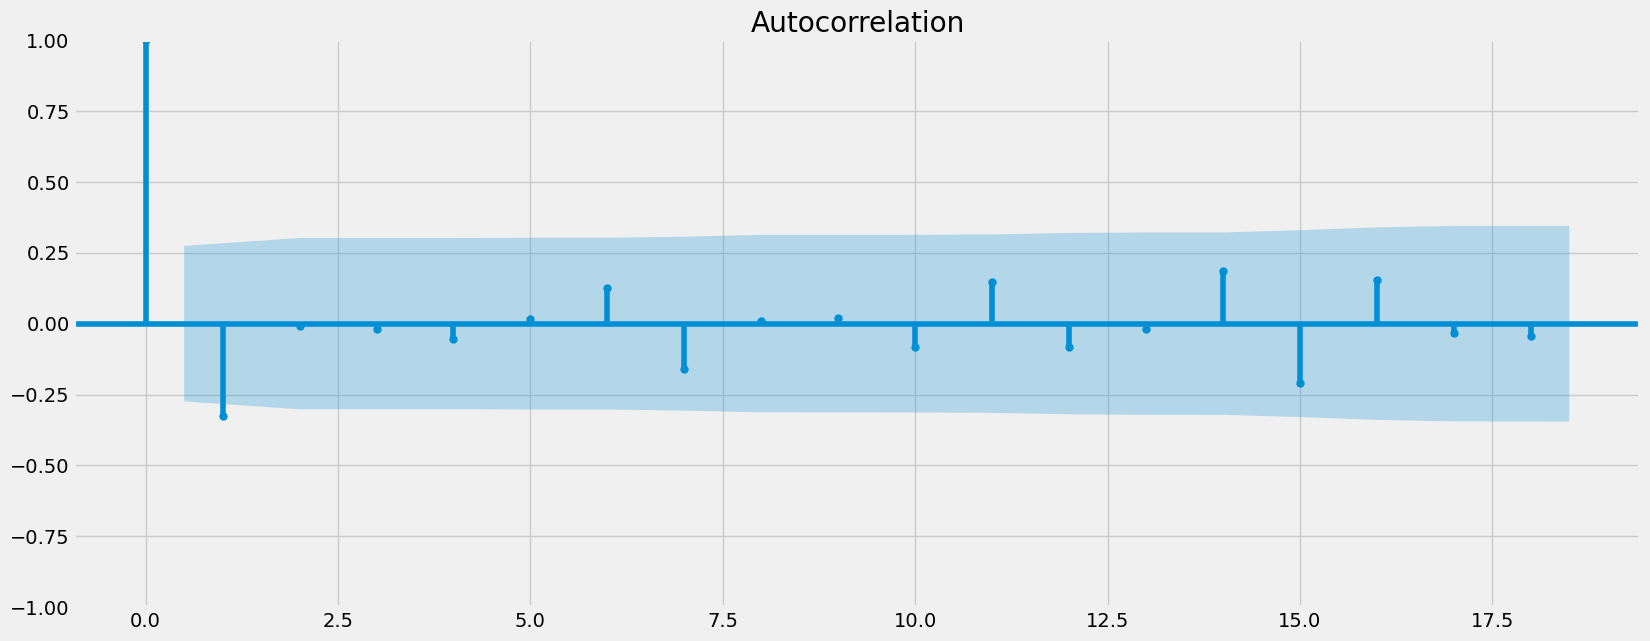

In [53]:
plot_acf(data_diff_2)
plt.show()

No autocorrelation